In [1]:
import matplotlib.pyplot as plt

from control_guided_nas import get_max_diam

latency = {
    "l11_tcp": [0.006, 0.018, 0.029, 0.051, 0.066],
    "l11_udp": [0.006, 0.006, 0.006, 0.006, 0.006],
    "l15_tcp": [0.003, 0.005, 0.011, 0.013, 0.021],
    "l15_udp": [0.005, 0.005, 0.005, 0.005, 0.005]
}

accuracy = {
    "l11_tcp": [0.6501, 0.6501, 0.6501, 0.6501, 0.6501],
    "l11_udp": [0.6198, 0.5807, 0.5477, 0.5193, 0.4888],
    "l15_tcp": [0.6756, 0.6756, 0.6756, 0.6756, 0.6756],
    "l15_udp": [0.6453, 0.6062, 0.5732, 0.5448, 0.5143]
}

diameter = {
    "F1": {},
    "CC": {}
}

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


In [2]:
def diam(latency: list[float], accuracy: list[float], sys: str):
    return [get_max_diam(l, (1 - a)**2, sysname=sys) for l, a in zip(latency, accuracy)]

for sys in ["F1", "CC"]:
    for setup in latency.keys():
        diameter[sys][setup] = diam(latency[setup], accuracy[setup], sys=sys)
        print(f"{sys} {setup} results")
        print(diameter[sys][setup])

F1 l11_tcp results
[0.5400218089027607, 0.8878185738803248, 1.3680954984775928, 11.320296956881466, 21.358079295223344]
F1 l11_udp results
[0.6304344916196415, 0.7747525674295128, 0.9324741424300049, 1.1032063934999177, 1.3342208193240515]
F1 l15_tcp results
[0.4416908193209497, 0.46265505557890596, 0.5603399591339945, 0.608434494115135, 0.8692879075402842]
F1 l15_udp results
[0.5389342620226653, 0.6581678650906216, 0.7848015381854578, 0.9213409580933762, 1.1042560096708864]
CC l11_tcp results
[1.1660001630572143, 1.1857229200513177, 1.2060515594135075, 1.2540104054633785, 1.2882542039286018]
CC l11_udp results
[1.3133007925622429, 1.585459350587042, 1.864052209016597, 2.1356471976877685, 2.46440652527491]
CC l15_tcp results
[1.073345436358294, 1.076104647474606, 1.0847933271594066, 1.0877058298034528, 1.1004583153641114]
CC l15_udp results
[1.1822097725072434, 1.399873663643848, 1.645723677323634, 1.8905559839929884, 2.1869725517068113]


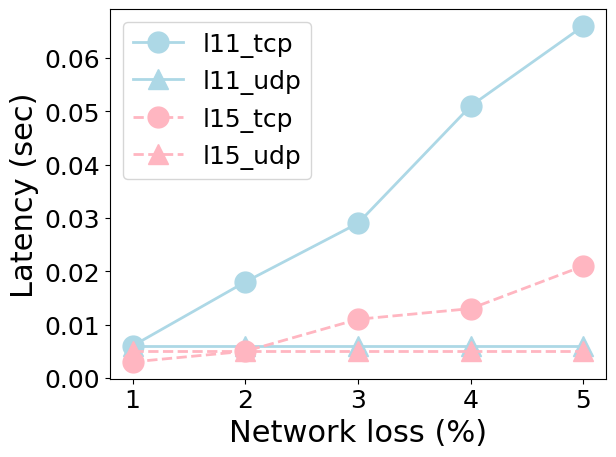

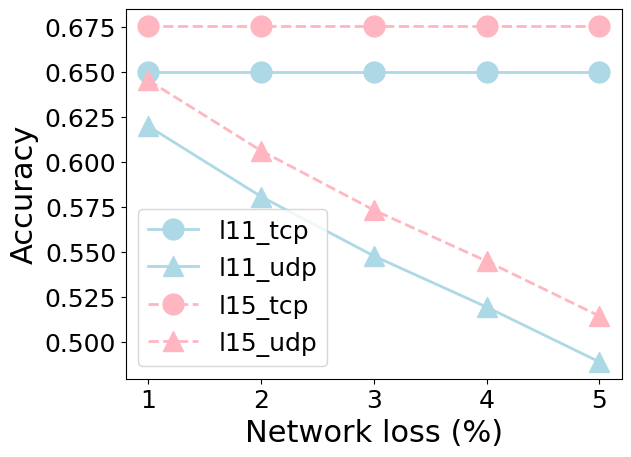

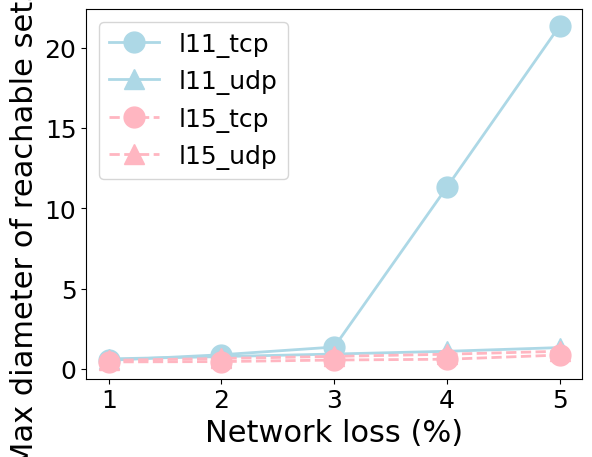

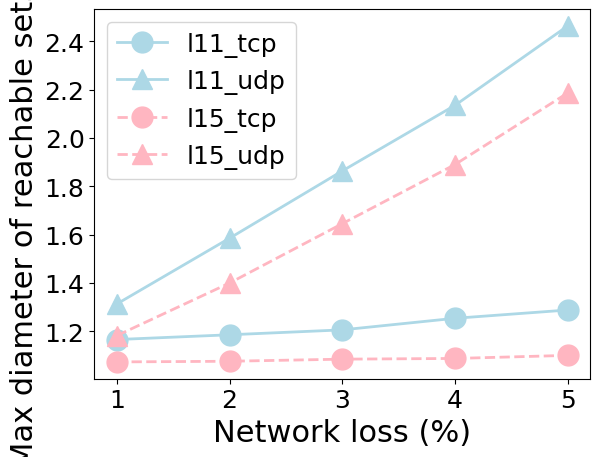

In [3]:
colors = {"l11": "lightblue", "l15": "lightpink"}
lstyle = {"l11": "solid", "l15": "dashed"}
marker = {"tcp": "o", "udp": "^"}
line_width = 2

# plt.style.use('ggplot')

for val, y in zip([latency, accuracy], ["Latency (sec)", "Accuracy"]):
    for setup in val.keys():
        layer, proto = setup.split('_')
        plt.plot(range(1, 6), val[setup], label=f"{setup}", color=colors[layer], marker=marker[proto], linestyle=lstyle[layer], lw=line_width, markersize=15)
    plt.xticks(range(1, 6), fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Network loss (%)", fontsize=22)
    plt.ylabel(y, fontsize=22)
    # plt.title("Reachability analysis with a simplified cruise control model", fontsize=18)
    plt.legend(fontsize=18)
    plt.show()

# Plotting
for sys in ["F1", "CC"]:
    for setup in latency.keys():
        layer, proto = setup.split('_')
        plt.plot(range(1, 6), diameter[sys][setup], label=f"{setup}", color=colors[layer], marker=marker[proto], linestyle=lstyle[layer], lw=line_width, markersize=15)
    plt.xticks(range(1, 6), fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Network loss (%)", fontsize=22)
    plt.ylabel("Max diameter of reachable sets (m)", fontsize=22)
    # plt.title("Reachability analysis with a simplified cruise control model", fontsize=18)
    plt.legend(fontsize=18)
    plt.show()